<a href="https://colab.research.google.com/github/annien094/EP-PINNs-for-drugs/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
%cd /content/drive/MyDrive/Annie/EP-PINNs_Annie

Mounted at /content/drive
/content/drive/MyDrive/Annie/EP-PINNs_Annie


In [2]:
!pip install DeepXDE==0.10

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Sat Jun  3 15:28:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+-------------

Instructions for updating:
non-resource variables are not supported in the long term


Using TensorFlow 2 backend.

Estimatig taud
Estimatig taur
Estimatig tausi
flag 1
Compiling model...
Building feed-forward neural network...
'build' took 0.065399 s



/usr/local/lib/python3.10/dist-packages/deepxde/maps/fnn.py:76: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 2.238613 s

flag 2
Initializing variables...
Training model...

Step      Train loss                                                                          Test loss                                                                           Test metric
0         [7.04e-04, 2.63e-04, 6.58e-05, 6.12e-04, 8.44e-02, 1.53e+00, 1.25e+00, 1.18e+00]    [7.11e-04, 2.55e-04, 6.26e-05, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1         [6.85e-04, 2.60e-04, 6.48e-05, 6.12e-04, 8.30e-02, 1.51e+00, 1.25e+00, 1.16e+00]    [6.92e-04, 2.52e-04, 6.17e-05, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00]    []  

Best model at step 1:
  train loss: 4.00e+00
  test loss: 1.01e-03
  test metric: []

'train' took 1.205712 s

flag 3
out_path: /content/drive/MyDrive/Annie
[<tf.Tensor 'Exp:0' shape=() dtype=float32>, <tf.Tensor 'Exp_1:0' shape=() dtype=float32>, <tf.Tensor 'Exp_2:0' shape=() dtype=float32>]
flag 3.1
flag 3.2
flag 3.3
Training model...

Step      Train loss    

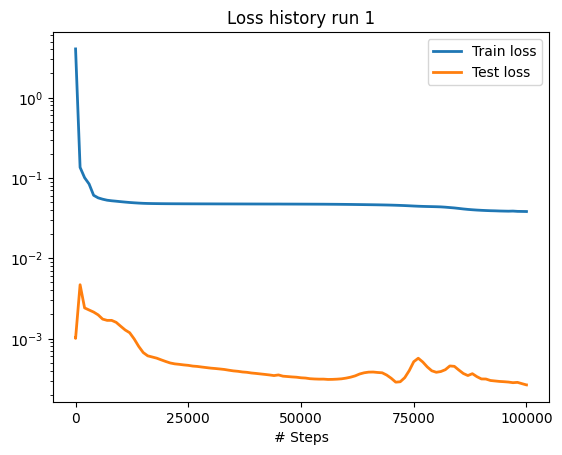

<Figure size 640x480 with 0 Axes>

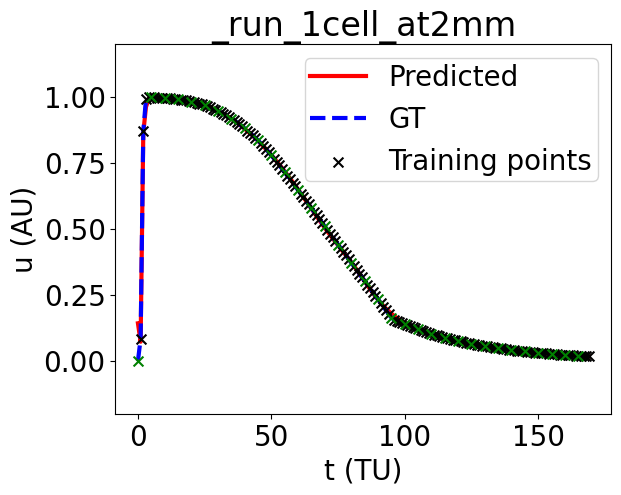

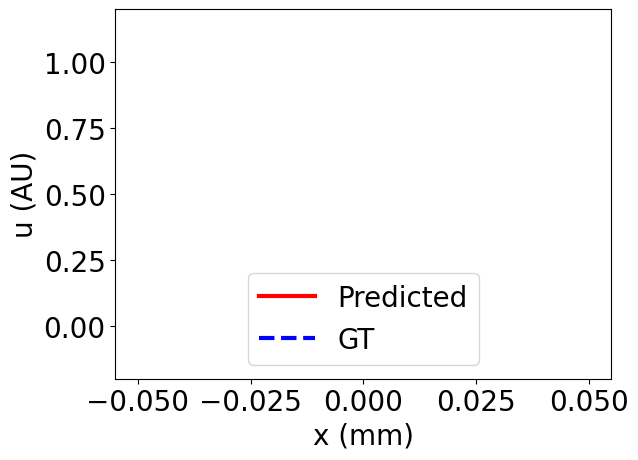

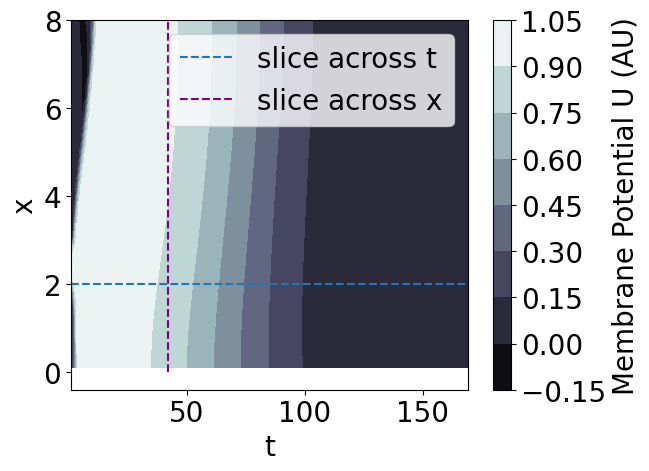

<Figure size 640x480 with 0 Axes>

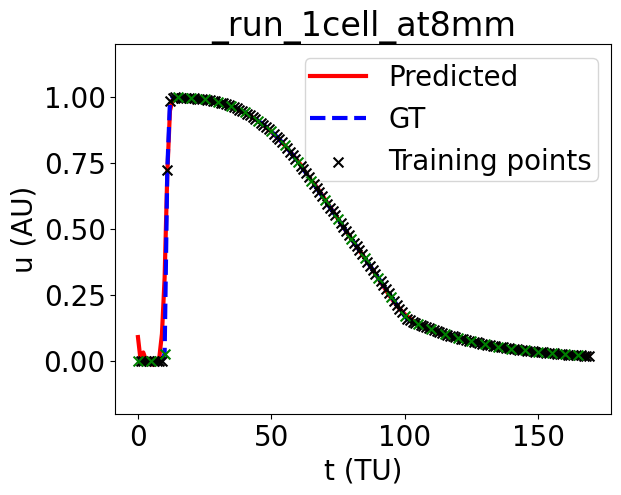

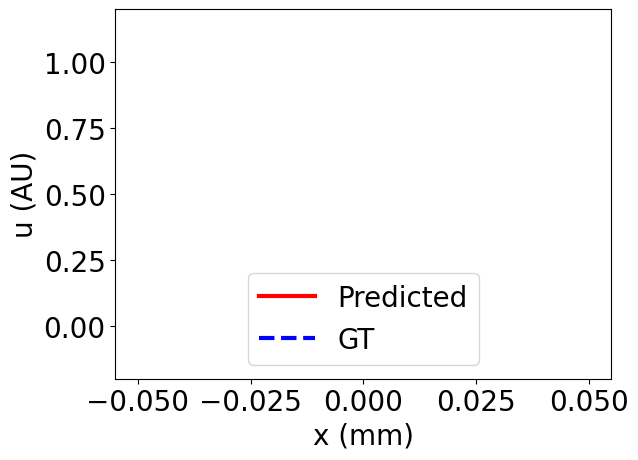

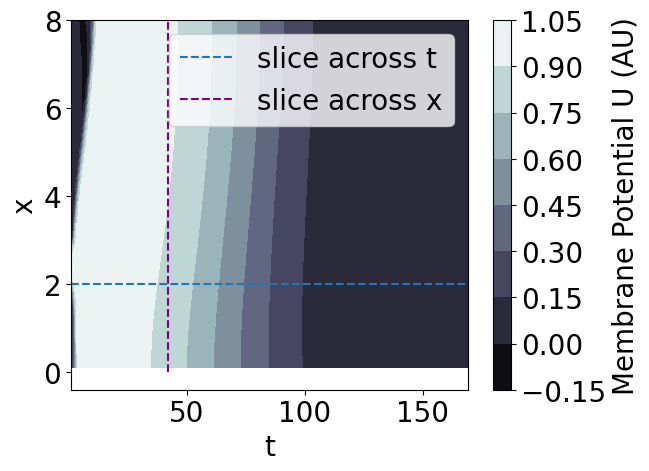

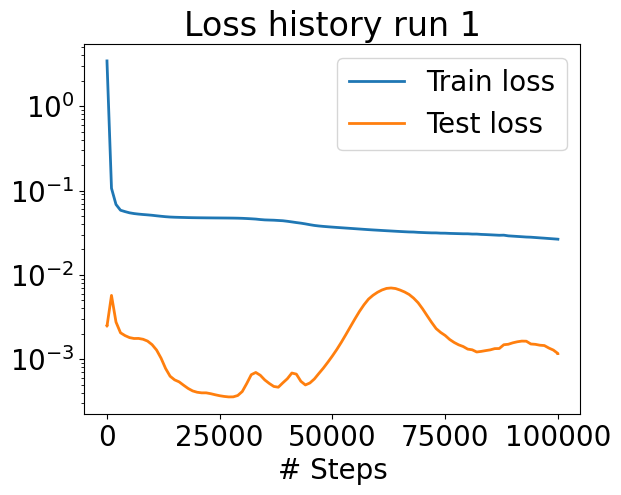

<Figure size 640x480 with 0 Axes>

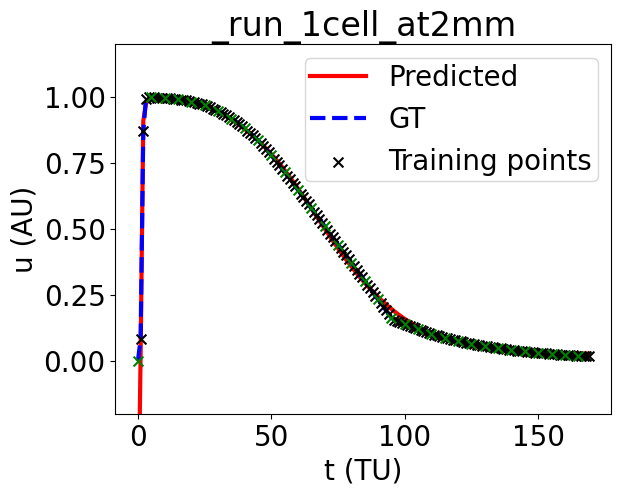

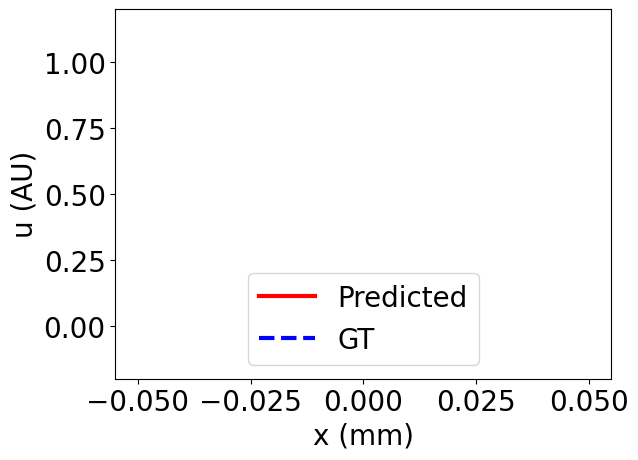

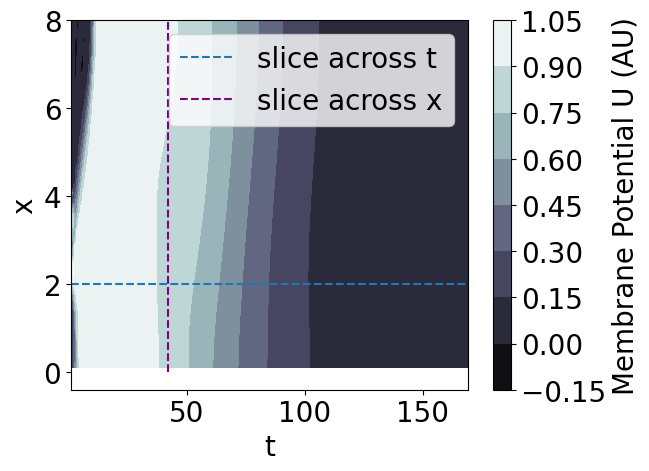

<Figure size 640x480 with 0 Axes>

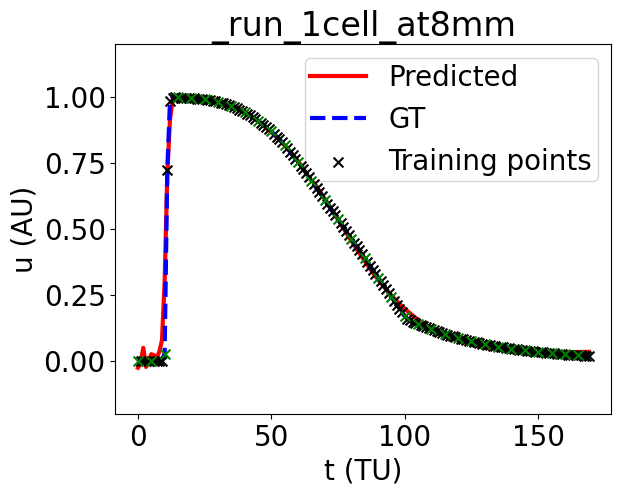

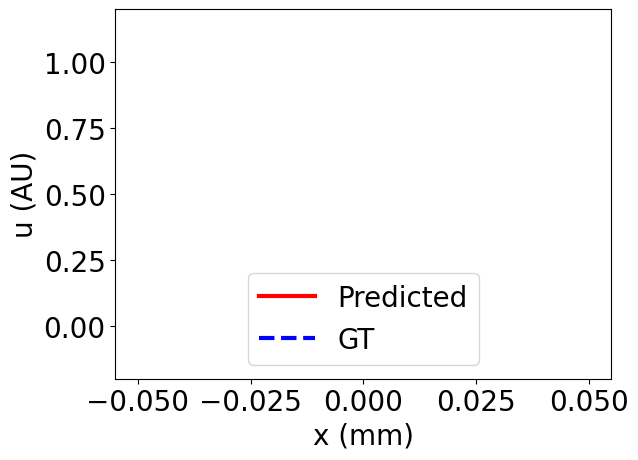

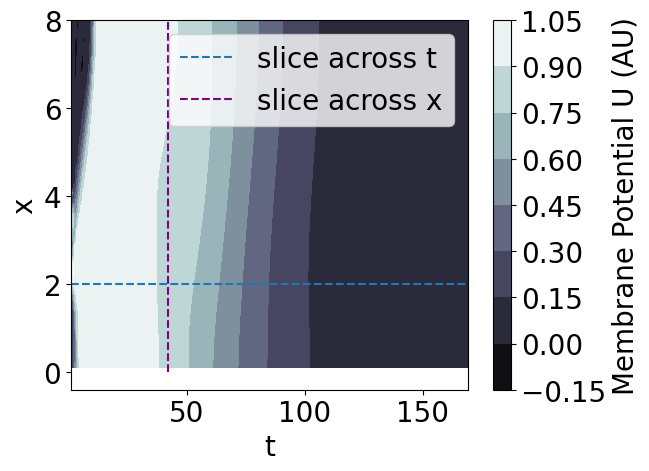

In [3]:
import sys
import os
import csv
#dir_path = os.path.dirname(os.path.realpath(__file__))
#sys.path.append(dir_path)
dir_path = '/content/drive/MyDrive/Annie'
#sys.path.append(dir_path)
from sklearn.model_selection import train_test_split
from deepxde.backend import tf
import matplotlib.pyplot as plt
import argparse
import numpy as np
import deepxde as dde # version 0.11 or higher
from generate_plot import plot_1D  # should be changed for the new one
from generate_plots_2d import plot_2D
#from generate_plots_1d_MV import plot_1D
import utils

#if __name__ == "__main__":
    #parser = argparse.ArgumentParser()
    #parser.add_argument('-f', '--file-name', dest='file_name', required = True, type = str, help='File name for input data')
    #parser.add_argument('-m', '--model-folder-name', dest='model_folder_name', required = False, type = str, help='Folder name to save model (prefix /)')
    #parser.add_argument('-d', '--dimension', dest='dim', required = True, type = int, help='Model dimension. Needs to match the input data')
    #parser.add_argument('-n', '--noise', dest='noise', action='store_true', help='Add noise to the data')
    #parser.add_argument('-w', '--w-input', dest='w_input', action='store_true', help='Add W to the model input data')
    #parser.add_argument('-v', '--inverse', dest='inverse', required = False, type = str, help='Solve the inverse problem, specify variables to predict (e.g. a / ad / abd')
    #parser.add_argument('-ht', '--heter', dest='heter', required = False, action='store_true', help='Predict heterogeneity - only in 2D')
    #parser.add_argument('-p', '--plot', dest='plot', required = False, action='store_true', help='Create and save plots')
    #parser.add_argument('-a', '--animation', dest='animation', required = False, action='store_true', help='Create and save 2D Animation')
    #args = parser.parse_args()


## Network Parameters
# 1D
input_1d = 2 # network input size (1D) # dimension of the X
num_hidden_layers_1d = 4 # number of hidden layers for NN (1D)
hidden_layer_size_1d = 32 # size of each hidden layers (1D)
output_1d = 3 # network output size (1D)
# 2D
input_2d = 3 # network input size (2D)
num_hidden_layers_2d = 4 # number of hidden layers for NN (2D)
hidden_layer_size_2d = 32 # size of each hidden layers (2D)
output_2d = 3 # network output size (2D)
output_heter = 3 # network output size for heterogeneity case (2D)
## Training Parameters
num_domain = 20000 # number of training points within the domain
num_boundary = 1000 # number of training boundary condition points on the geometry boundary
num_test = 1000 # number of testing points within the domain
num_initial = 98 # number of points to test the initial conditions
MAX_MODEL_INIT = 16 # maximum number of times allowed to initialize the model
MAX_LOSS = 4 # upper limit to the initialized loss
epochs = 100000 #60000 # number of epochs for training
lr =  0.00005 # learning rate
noise = 0.1 # noise factor
test_size = 0.1 # precentage of testing data 

def main(i, datafilename, writer):

    dim = 1
    noise_introduced = False
    inverse_activated = True
    inverse_string = 'fix_tauo'
    inverse = ['taud','taur','tausi']  #[inverse_string]
    model_folder_name = '/content'
    animation = False
    heter = False
    w_used = False #data

    ## Get Dynamics Class
    dynamics = utils.system_dynamics()

    ## Parameters to inverse (if needed)
    params = dynamics.params_to_inverse(inverse)

    ## Generate Data
    file_name =  datafilename
    observe_x, u, w = dynamics.generate_data(file_name, dim)

    ## Split data to train and test
    #old code - choose test points randomly
    #observe_train, observe_test, u_train, u_test = train_test_split(observe_x, u, test_size=test_size, random_state=123)

    #new code - select 1 test point for every 10 points at each unique location
    train_mask = np.zeros(len(u), dtype=bool)
    nlocs = len(np.unique(observe_x[:,0]))   #number of unique locations with observations
    for i in range(nlocs):
      train_mask[i::10] = True

    u_test = u[train_mask]
    u_train = u[~train_mask]

    observe_test = observe_x[train_mask]
    observe_train = observe_x[~train_mask]

    ## Split with W
    if w_used:
      observe_train, observe_test, u_train, u_test, w_train, w_test = train_test_split(observe_x, u, w, test_size=test_size)

    ## Add noise to training data if needed
    if noise_introduced:
        u_train = u_train + noise*np.random.randn(u_train.shape[0], u_train.shape[1])

    ## Geometry and Time domains
    geomtime = dynamics.geometry_time(dim)
    ## Define Boundary Conditions
    bc = dynamics.BC_func(dim, geomtime)
    ## Define Initial Conditions
    ic_u, ic_v, ic_w = dynamics.IC_func(observe_train, u_train, geomtime)

    ## Model observed data
    observe_u = dde.PointSetBC(observe_train, u_train, component=0)  # component says which component it is
    input_data = [bc, ic_u, ic_v, ic_w, observe_u]
    if w_used: ## If W required as an input
        observe_w = dde.PointSetBC(observe_train, w_train, component=1)  # probably will have to change component to =2s
        input_data = [bc, ic, observe_u, observe_w]

    ## Select relevant PDE (Dim, Heterogeneity) and define the Network
    if dim == 1:
        pde = dynamics.pde_1D
        net = dde.maps.FNN([input_1d] + [hidden_layer_size_1d] * num_hidden_layers_1d + [output_1d], "tanh", "Glorot uniform")
    elif dim == 2 and heter:
        pde = dynamics.pde_2D_heter
        net = dde.maps.FNN([input_2d] + [hidden_layer_size_2d] * num_hidden_layers_2d + [output_heter], "tanh", "Glorot uniform")
        net.apply_output_transform(dynamics.modify_output_heter)
    elif dim == 2 and not heter:
        pde = dynamics.pde_2D
        net = dde.maps.FNN([input_2d] + [hidden_layer_size_2d] * num_hidden_layers_2d + [output_2d], "tanh", "Glorot uniform")
    pde_data = dde.data.TimePDE(geomtime, pde, input_data,
                            num_domain = num_domain,
                            num_boundary=num_boundary,
                            num_initial = num_initial,
                            anchors=observe_train,
                            num_test=num_test)
    model = dde.Model(pde_data, net)
    #loss_weights = [1]*(len(input_data)+2)  # original
    #loss_weights = [1]*(len(input_data)+3)   # mine (new)
    #loss_weights[0:2] = (1.5,1.5)
    #model.compile("adam", lr=lr, loss_weights=loss_weights)
    print("flag 1")
    model.compile("adam", lr=lr)
    print("flag 2")

    ## Stabalize initialization process by capping the losses
    losshistory, _ = model.train(epochs=1)
    num_itertions = len(losshistory.loss_train)
    initial_loss = max(losshistory.loss_train[num_itertions - 1])
    num_init = 0
    while initial_loss>MAX_LOSS or np.isnan(initial_loss).any() or np.isinf(initial_loss).any():  # added checking for inf values
        num_init += 1
        model = dde.Model(pde_data, net)
        model.compile("adam", lr=lr)
        #model.compile("adam", lr=lr, loss_weights=loss_weights)
        losshistory, _ = model.train(epochs=1)
        initial_loss = max(losshistory.loss_train[0])
        if num_init > MAX_MODEL_INIT:
            raise ValueError('Model initialization phase exceeded the allowed limit')

    print("flag 3")


    #D = tf.math.exp(tf.Variable(-1.897119985))  #initialised to 0.15
    #D = tf.math.exp(dde.Variable(-0.6931471806))  #initialised to 0.5
    #D = dde.Variable(0.5)
    ## Train Network
    out_path = dir_path
    print("out_path: " + out_path)
    print(params)
    if inverse_activated:
        #model.compile("adam", lr=lr, metrics=["l2 relative error"], external_trainable_variables=params[0]) #added
        print("flag 3.1")
        variables_file = "run " + str(i) + "_" + inverse_string + ".dat"
        print("flag 3.2")
        variable = dde.callbacks.VariableValue(params, period=1000, filename=variables_file)
        #checkpointer = dde.callbacks.ModelCheckpoint(filepath, verbose=0, save_better_only=True, period=1, monitor='train loss')
        print("flag 3.3")
        losshistory, train_state = model.train(epochs=epochs, model_save_path = out_path + 'run' + str(i), callbacks=[variable])
        print("flag 3.4")
    else:
        print("flag 3.5")
        losshistory, train_state = model.train(epochs=epochs, model_save_path = out_path, display_every=1000)  # crashes here
        print("flag 3.6")

    # Plot loss history
    loss_train = np.sum(losshistory.loss_train, axis=1)
    loss_test = np.sum(losshistory.loss_test, axis=1)

    plt.figure()
    plt.semilogy(losshistory.steps, loss_train, label="Train loss", linewidth=2)
    plt.semilogy(losshistory.steps, loss_test, label="Test loss", linewidth=2)
    plt.title("Loss history run " + str(i))
    for i in range(len(losshistory.metrics_test[0])):
        plt.semilogy(
            losshistory.steps,
            np.array(losshistory.metrics_test)[:, i],
            label="Test metric",
        )
    plt.xlabel("# Steps")
    plt.legend()
    plt.savefig("Loss history run " + str(i))

    print("flag 4")

    ## Compute rMSE for testing data & all (training + testing) 
    u_pred_test = model.predict(observe_test)[:,0:1]  # add predict V and W and then plot them (in forward mode)
    rmse_u_test = np.sqrt(np.square(u_pred_test - u_test).mean())
    u_pred_train = model.predict(observe_train)[:,0:1]
    rmse_u_train = np.sqrt(np.square(u_pred_train - u_train).mean())
    test_err2 = np.square(u_pred_test - u_test)
    train_err2 = np.square(u_pred_train - u_train)
    all_err2 = np.concatenate((test_err2, train_err2))
    rmse_u_all = np.sqrt( all_err2.mean() )

    data_rmse = [i, rmse_u_test, rmse_u_train, rmse_u_all]
    writer.writerow(data_rmse)

    print('--------------------------')
    print('V rMSE for test data:'+ str(i), rmse_u_test)
    print('V rMSE for train data:'+ str(i), rmse_u_train)
    print('V rMSE for all data:'+ str(i), rmse_u_all)
    print('--------------------------')
    print("Arguments: ")
    #print("Arguments: ", args)

    print("flag 5")

    # Plot
    x_to_plot = [2, 8] #we have placed the observations at cell 20 and 80
    t_to_plot = 0.25
    data_list = [observe_x, observe_train, u_train, u, observe_test, u_test]
    if True and dim == 1:
        for j in range(len(x_to_plot)):
            plot_1D(data_list, dynamics, model, model_folder_name, [x_to_plot[j], t_to_plot], i)
    elif True and dim == 2:
        plot_2D(data_list, dynamics, model, animation, model_folder_name)
    return data_list,dynamics, model, model_folder_name

## Run main code
# Write all rmse into a file
header = ['run', 'rmse_test', 'rmse_train', 'rmse_all']
f = open('rmse_synthetic_FK.csv', 'w')
writer = csv.writer(f)
writer.writerow(header)

# for i in [8,9]:
    #  data_list_exp,dynamics_exp, model_exp, model_folder_name_exp = main(str(i) + '_IC50', "HMR1556_IC50_PINNs_plate1", writer)

# for i in [8,9]:
    # data_list_exp,dynamics_exp, model_exp, model_folder_name_exp = main(str(i) , "Nifidepine_IC50_PINNs", writer)

for i in [0,1]:
     data_list_exp,dynamics_exp, model_exp, model_folder_name_exp = main(str(i) , "synthetic_data_usav_FKparams", writer)
f.close()
